<h1>Importing the Data</h1>

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
train_url="https://drive.google.com/uc?export=download&id=1DdyFZ9fizNFyinCvnW3npY7S43bkzD63"
test_url="https://drive.google.com/uc?export=download&id=1vii5mpTPPrSExmg5S0eVcL4cmdLi-F9L"
train_set=pd.read_csv(train_url)
test_set=pd.read_csv(test_url)
train_set.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84 kmpl,1199 CC,84 bhp,5.0,5.00
1,1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49 kmpl,1493 CC,100 bhp,7.0,8.37
2,2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.0 kmpl,1598 CC,103.52 bhp,5.0,4.50
3,3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.2 kmpl,1396 CC,53.5 bhp,5.0,0.85
4,4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02 kmpl,1248 CC,88.76 bhp,5.0,2.65


In [242]:
train_set.drop('Unnamed: 0',axis=1,inplace=True)

<h1>Data Preparatio</h1>

In [244]:
df=train_set.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3750 non-null   object 
 1   Location           3750 non-null   object 
 2   Year               3750 non-null   int64  
 3   Kilometers_Driven  3750 non-null   int64  
 4   Fuel_Type          3750 non-null   object 
 5   Transmission       3750 non-null   object 
 6   Owner_Type         3750 non-null   object 
 7   Mileage            3749 non-null   object 
 8   Engine             3722 non-null   object 
 9   Power              3722 non-null   object 
 10  Seats              3718 non-null   float64
 11  Price              3750 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 351.7+ KB


In [245]:
object_value_columns=["Mileage","Engine","Power"]
for i in object_value_columns:
    df[i]=df[i].str.extract(r"([0-9]*\.?[0-9]+)").astype(np.float64)
    #df[i]=df[i].astype(np.float64)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84,1199.0,84.00,5.0,5.00
1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49,1493.0,100.00,7.0,8.37
2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.00,1598.0,103.52,5.0,4.50
3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.20,1396.0,53.50,5.0,0.85
4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02,1248.0,88.76,5.0,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...
3745,BMW X5 3.0d,Chennai,2009,150000,Diesel,Automatic,First,11.00,2993.0,235.00,5.0,18.75
3746,Mahindra Scorpio 2009-2014 VLX 4WD AT 7S BSIV,Delhi,2012,85000,Diesel,Automatic,First,11.79,2179.0,120.00,7.0,6.25
3747,Maruti Wagon R LXI BSII,Ahmedabad,2007,55100,Petrol,Manual,First,18.90,998.0,67.10,5.0,1.45
3748,Renault Duster 85PS Diesel RxL,Hyderabad,2014,77500,Diesel,Manual,First,20.45,1461.0,83.80,5.0,6.60


In [246]:
object_columns=["Location","Fuel_Type","Transmission","Owner_Type"]
for i in object_columns:
    print(df[i].value_counts())

Location
Mumbai        491
Hyderabad     469
Coimbatore    424
Kochi         400
Pune          367
Kolkata       333
Delhi         319
Chennai       305
Jaipur        272
Bangalore     234
Ahmedabad     136
Name: count, dtype: int64
Fuel_Type
Diesel      1998
Petrol      1751
Electric       1
Name: count, dtype: int64
Transmission
Manual       2673
Automatic    1077
Name: count, dtype: int64
Owner_Type
First             3083
Second             589
Third               73
Fourth & Above       5
Name: count, dtype: int64


<h1>Encoding the Data</h1>

In [248]:
def encoder(df,column):
    keys=df[column].unique()
    values=list(range(1,len(keys)+1))
    encoding=dict(map(lambda x:(x[0],x[1]),zip(keys,values)))
    df[column]=pd.Series(map(lambda x:encoding[x],df[column]))
    return encoding
encoding_list=list()
for i in object_columns:
    encoding_list.append(encoder(df,i))
print(encoding_list)
df.head()

[{'Hyderabad': 1, 'Kochi': 2, 'Mumbai': 3, 'Jaipur': 4, 'Pune': 5, 'Kolkata': 6, 'Coimbatore': 7, 'Bangalore': 8, 'Delhi': 9, 'Chennai': 10, 'Ahmedabad': 11}, {'Petrol': 1, 'Diesel': 2, 'Electric': 3}, {'Manual': 1, 'Automatic': 2}, {'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4}]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Tata Tiago 1.2 Revotron XZ WO Alloy,1,2017,16500,1,1,1,23.84,1199.0,84.00,5.0,5.00
1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,2,2017,47357,2,2,1,18.49,1493.0,100.00,7.0,8.37
2,Skoda Rapid 2013-2016 1.6 MPI Ambition,3,2014,35000,1,1,1,15.00,1598.0,103.52,5.0,4.50
3,Tata Indica V2 DLS BSII,4,2007,200000,2,1,2,17.20,1396.0,53.50,5.0,0.85
4,Tata Manza Club Class Quadrajet90 LX,3,2013,64000,2,1,2,21.02,1248.0,88.76,5.0,2.65


<h1>Data Analysis</h1>

In [250]:
df.describe()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.00000,3749.000000,3722.000000,3652.000000,3718.000000,3750.000000
mean,5.312000,2013.313333,58128.811733,1.533333,1.287200,1.20000,18.041376,1621.910532,113.589670,5.277838,9.498632
std,3.043867,3.264250,40343.978048,0.499488,0.452516,0.45496,4.522901,601.708673,54.229032,0.806216,11.207836
min,1.000000,1998.000000,1000.000000,1.000000,1.000000,1.00000,0.000000,72.000000,34.200000,2.000000,0.440000
25%,3.000000,2011.000000,34000.000000,1.000000,1.000000,1.00000,15.260000,1198.000000,75.705000,5.000000,3.500000
50%,5.000000,2014.000000,53000.000000,2.000000,1.000000,1.00000,18.000000,1493.000000,98.590000,5.000000,5.665000
75%,8.000000,2016.000000,73157.750000,2.000000,2.000000,1.00000,20.890000,1984.750000,138.100000,5.000000,9.900000
max,11.000000,2019.000000,775000.000000,3.000000,2.000000,4.00000,28.400000,5461.000000,550.000000,10.000000,160.000000


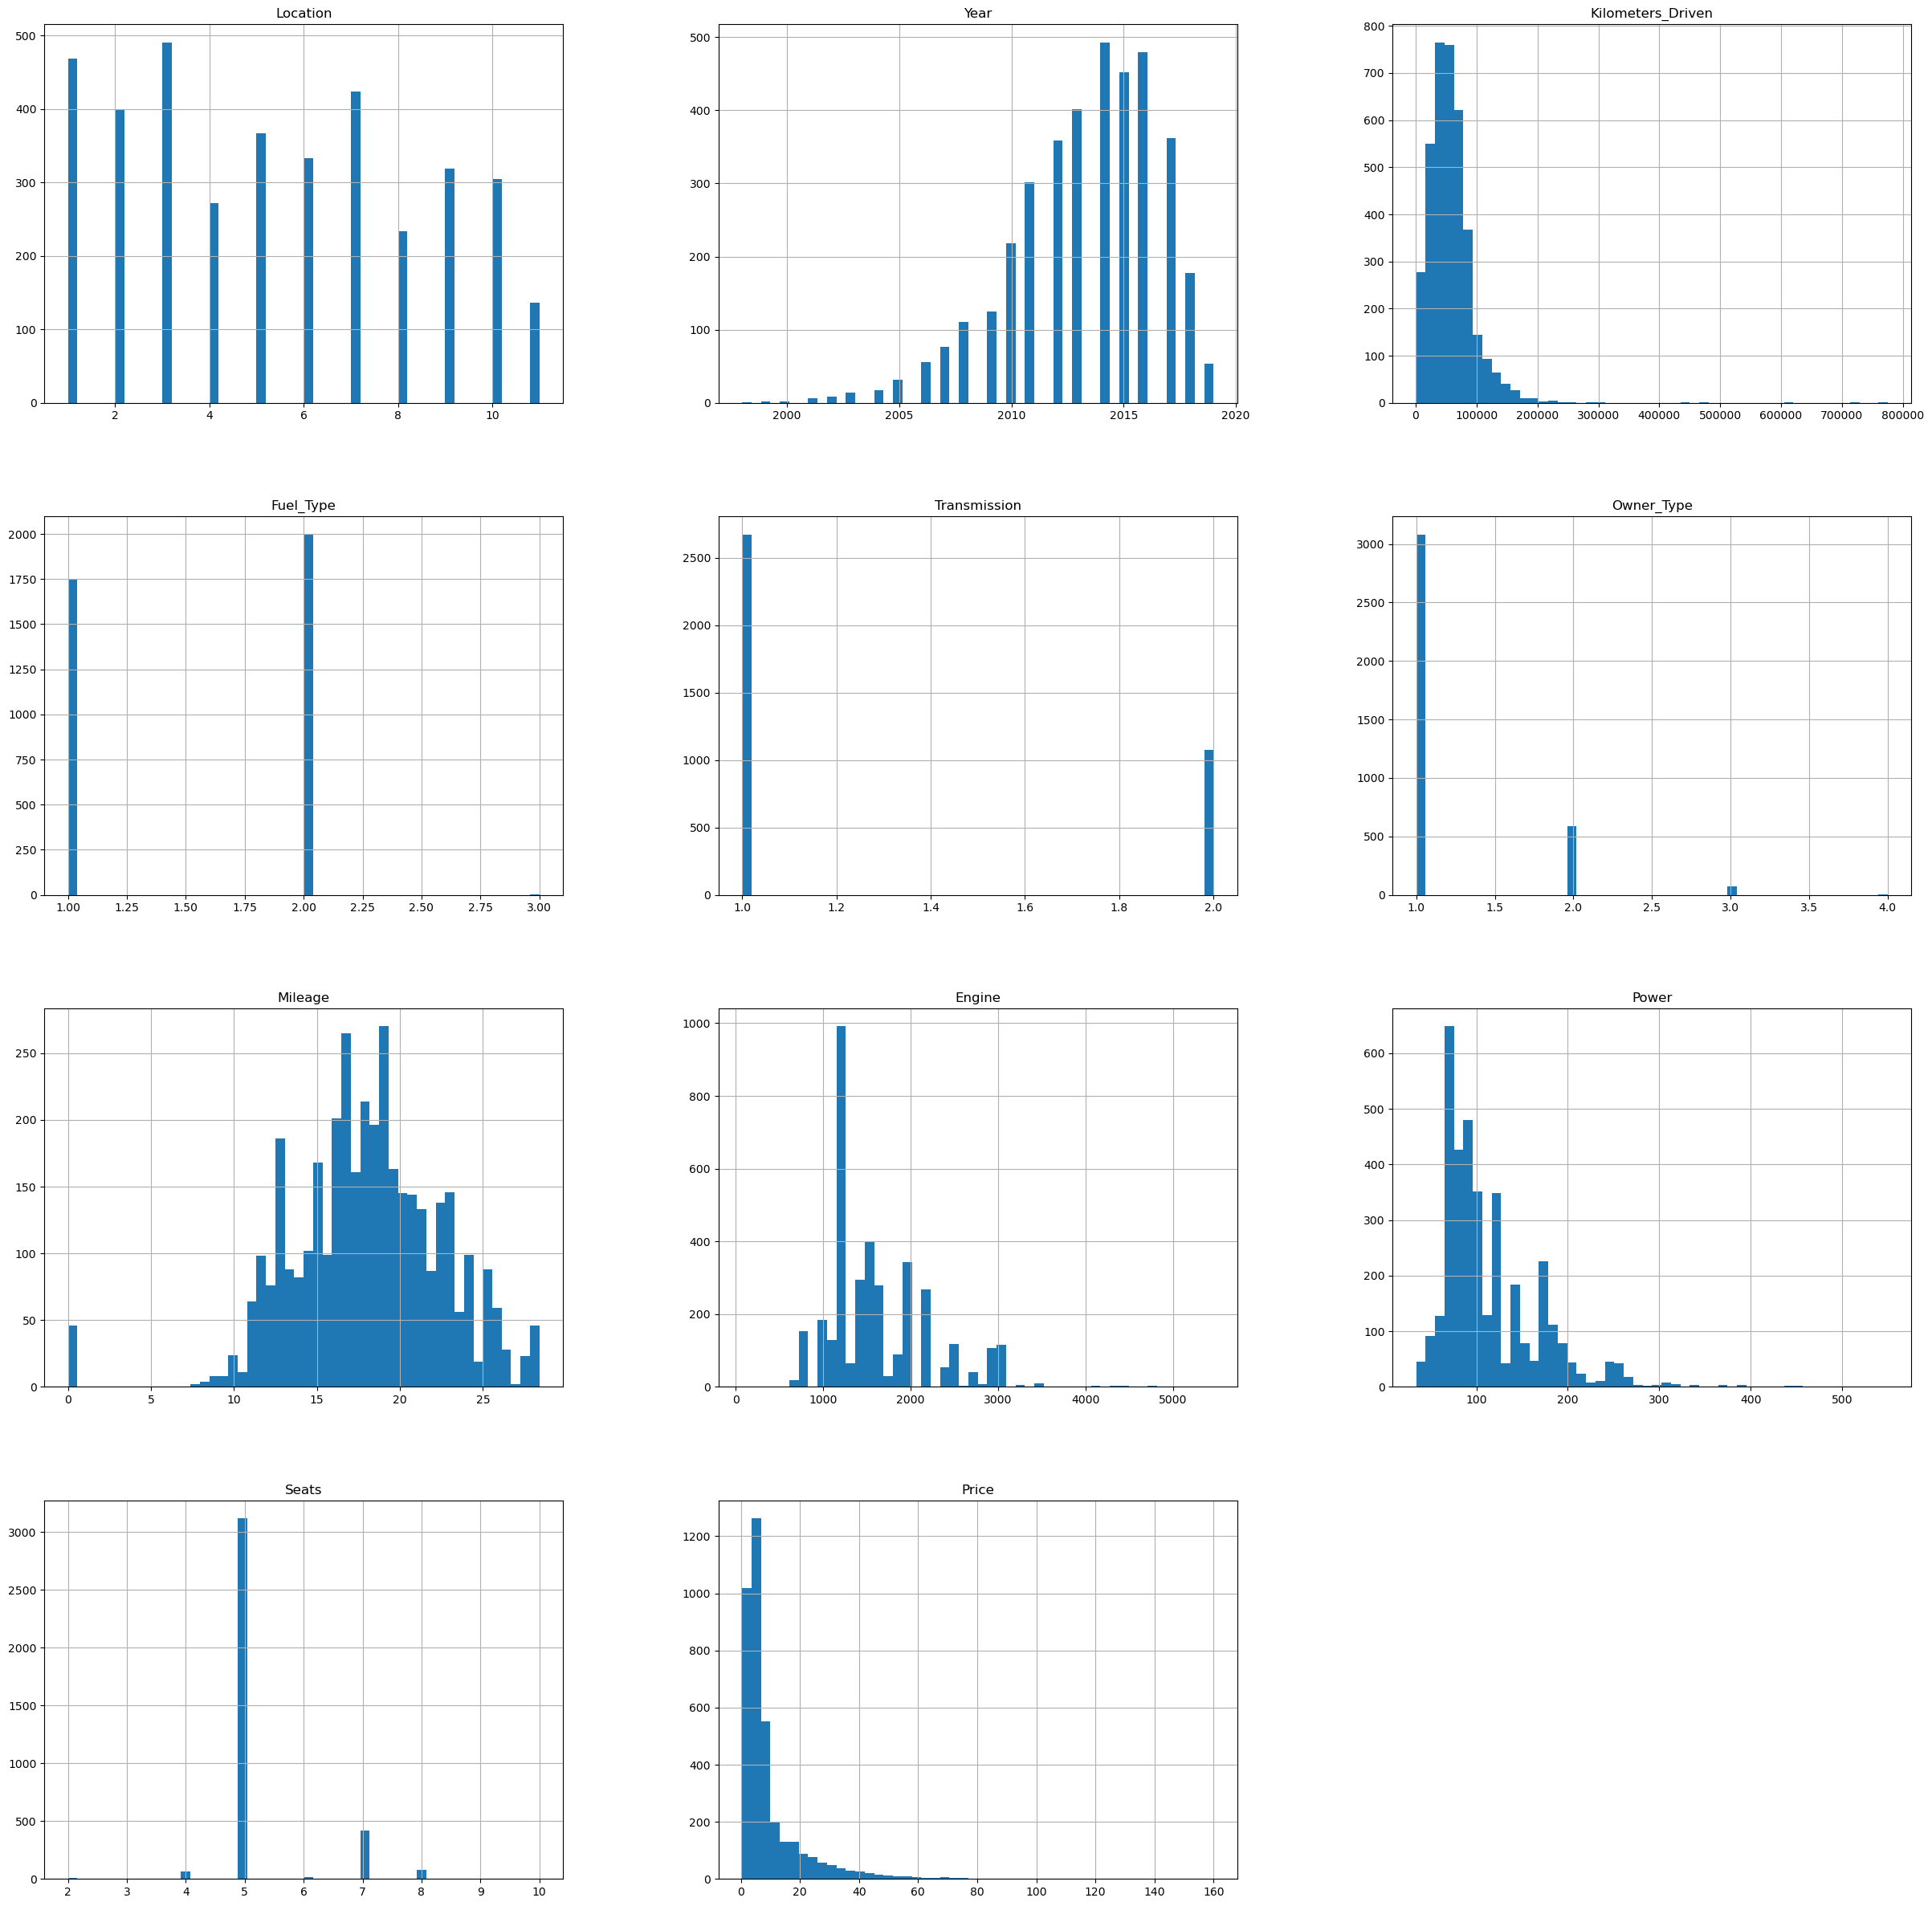

In [251]:
df.hist(bins=50,figsize=(30,30))
plt.show()

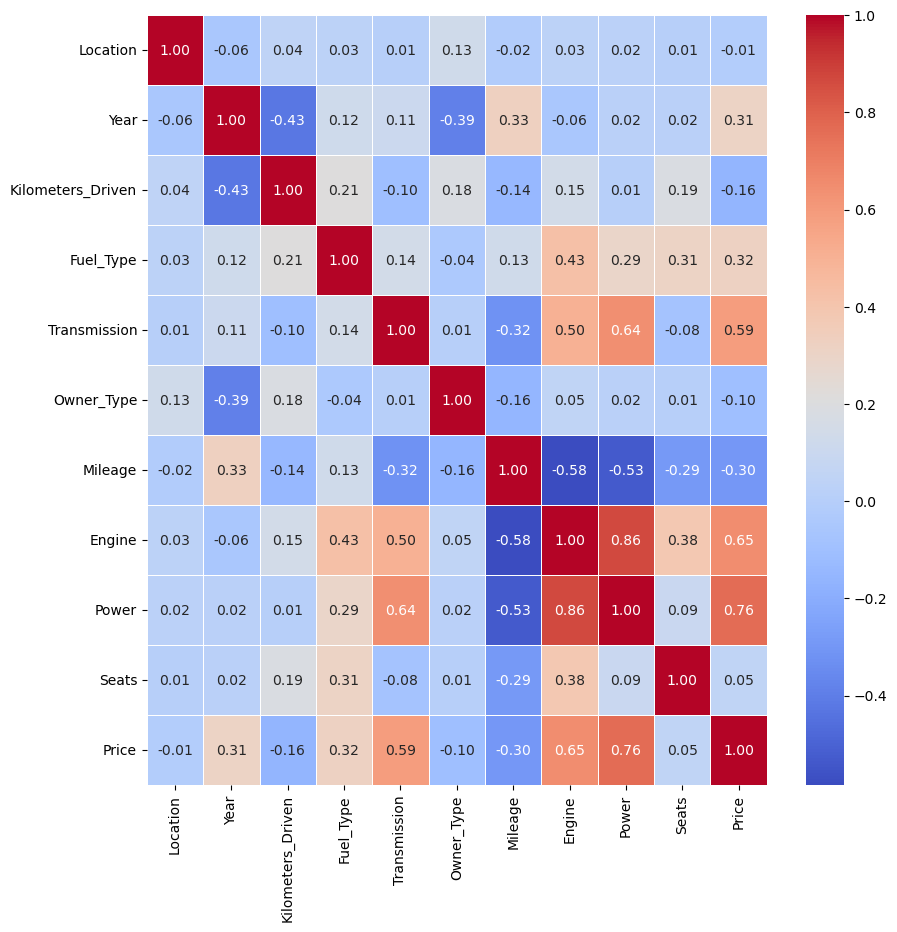

In [260]:
corr_matrix=df.drop("Name",axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True,linewidth=0.5,fmt='.2f')
plt.show()

<p>We will be dropping the Location and Seats because they're effectively useless</p>

<Axes: xlabel='Power', ylabel='Price'>

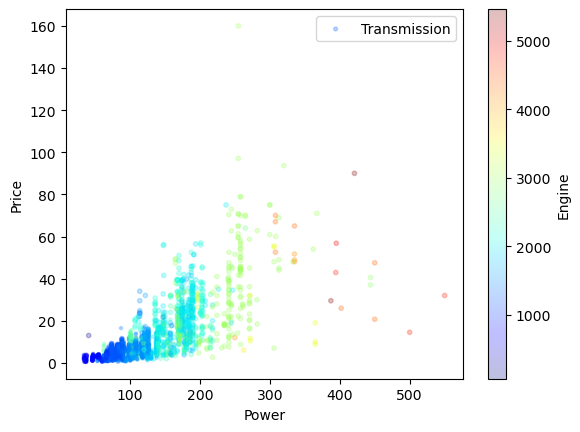

In [263]:
df.drop(['Location','Seats','Name'],axis=1,inplace=True)
df.plot(kind="scatter",x='Power',y='Price',s=df['Transmission']*5,label="Transmission",c='Engine',cmap="jet",colorbar=True,alpha=0.25)

<Axes: xlabel='Engine', ylabel='Price'>

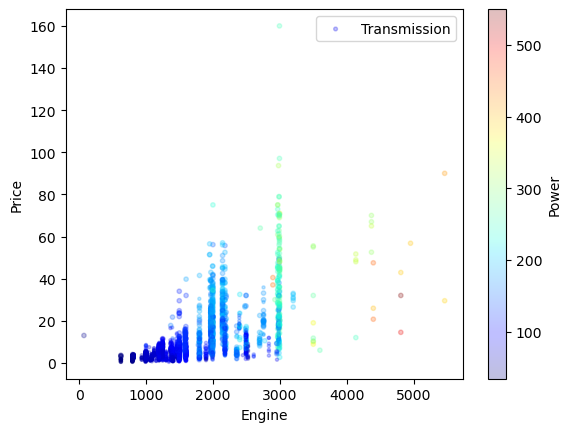

In [265]:
df.plot(kind="scatter",x='Engine',y='Price',s=df['Transmission']*5,label="Transmission",c='Power',cmap="jet",colorbar=True,alpha=0.25)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,km_per_year
Year,1.000000,-0.426688,0.123080,0.108084,-0.391368,0.328667,-0.055281,0.018628,0.311836,0.265339
Kilometers_Driven,-0.426688,1.000000,0.212958,-0.101796,0.184114,-0.140580,0.145754,0.005258,-0.161540,0.632013
Fuel_Type,0.123080,0.212958,1.000000,0.144682,-0.043430,0.130959,0.427457,0.290286,0.320814,0.288870
Transmission,0.108084,-0.101796,0.144682,1.000000,0.005960,-0.323838,0.499607,0.642160,0.587183,-0.029854
Owner_Type,-0.391368,0.184114,-0.043430,0.005960,1.000000,-0.155760,0.048446,0.019908,-0.101788,-0.076283
Mileage,0.328667,-0.140580,0.130959,-0.323838,-0.155760,1.000000,-0.584338,-0.529554,-0.296911,0.066305
Engine,-0.055281,0.145754,0.427457,0.499607,0.048446,-0.584338,1.000000,0.864676,0.650331,0.117746
Power,0.018628,0.005258,0.290286,0.642160,0.019908,-0.529554,0.864676,1.000000,0.761595,0.029832
Price,0.311836,-0.161540,0.320814,0.587183,-0.101788,-0.296911,0.650331,0.761595,1.000000,0.073537
km_per_year,0.265339,0.632013,0.288870,-0.029854,-0.076283,0.066305,0.117746,0.029832,0.073537,1.000000


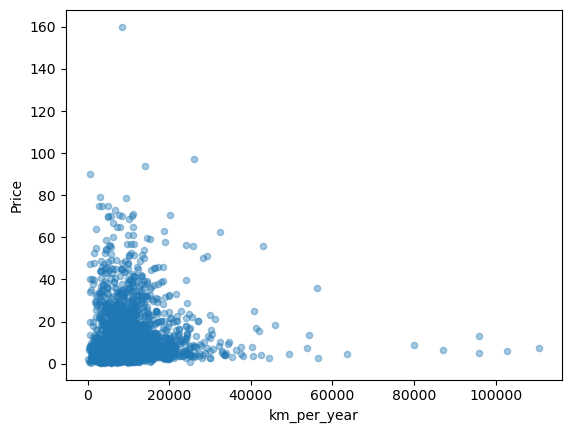

In [267]:
df['km_per_year']=df['Kilometers_Driven']/(2020-df['Year'])
df.plot(kind="scatter",x="km_per_year",y="Price",alpha=0.4)
df.drop("Name",axis=1).corr()

In [269]:
df.drop("km_per_year",axis=1,inplace=True)
df

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,Tata Tiago 1.2 Revotron XZ WO Alloy,2017,16500,1,1,1,23.84,1199.0,84.00,5.00
1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,2017,47357,2,2,1,18.49,1493.0,100.00,8.37
2,Skoda Rapid 2013-2016 1.6 MPI Ambition,2014,35000,1,1,1,15.00,1598.0,103.52,4.50
3,Tata Indica V2 DLS BSII,2007,200000,2,1,2,17.20,1396.0,53.50,0.85
4,Tata Manza Club Class Quadrajet90 LX,2013,64000,2,1,2,21.02,1248.0,88.76,2.65
...,...,...,...,...,...,...,...,...,...,...
3745,BMW X5 3.0d,2009,150000,2,2,1,11.00,2993.0,235.00,18.75
3746,Mahindra Scorpio 2009-2014 VLX 4WD AT 7S BSIV,2012,85000,2,2,1,11.79,2179.0,120.00,6.25
3747,Maruti Wagon R LXI BSII,2007,55100,1,1,1,18.90,998.0,67.10,1.45
3748,Renault Duster 85PS Diesel RxL,2014,77500,2,1,1,20.45,1461.0,83.80,6.60


<h1>Z-Score Normalisation</h1>

In [290]:
def normalise(df):
    mean=np.mean(df,axis=0)
    std_dev=np.std(df,axis=0)
    return(df-mean)/std_dev
n_df=pd.concat([normalise(df.select_dtypes(include="number")),df.select_dtypes(exclude="number")])
n_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 0 to 3749
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               3750 non-null   float64
 1   Kilometers_Driven  3750 non-null   float64
 2   Fuel_Type          3750 non-null   float64
 3   Transmission       3750 non-null   float64
 4   Owner_Type         3750 non-null   float64
 5   Mileage            3749 non-null   float64
 6   Engine             3722 non-null   float64
 7   Power              3652 non-null   float64
 8   Price              3750 non-null   float64
 9   Name               3750 non-null   object 
dtypes: float64(9), object(1)
memory usage: 644.5+ KB
